<a href="https://colab.research.google.com/github/PragyaGupta2912/Financial-Impact-of-Covid-19/blob/main/covid_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd

In [ ]:
!pip install yfinance

In [ ]:
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 14.5 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
from datetime import *
import pandas_datareader.data as data

import datetime as datetime
import math
import pandas as pd
import numpy as np
import pandas_datareader.data as data
from pandas.plotting import scatter_matrix
from pandas import Series, DataFrame
import copy

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl


In [ ]:
# setting the timeframe for our data
past = datetime.datetime(2020, 1, 1)
present = datetime.datetime(2021, 1, 1)

# Yahoo API google finance data
google2020 = data.DataReader("GOOG", 'yahoo', start=past, end=present)
google2020.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800,1738.849976
2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000,1776.089966
2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400,1758.719971
2020-12-30,1765.094971,1725.599976,1762.010010,1739.520020,1306100,1739.520020
2020-12-31,1758.930054,1735.420044,1735.420044,1751.880005,1011900,1751.880005


In [ ]:
# moving average mean of closing data for past 6 months
googleClose2020 = google2020['Adj Close']
#avgMean = googleClose.rolling(window=180).mean()

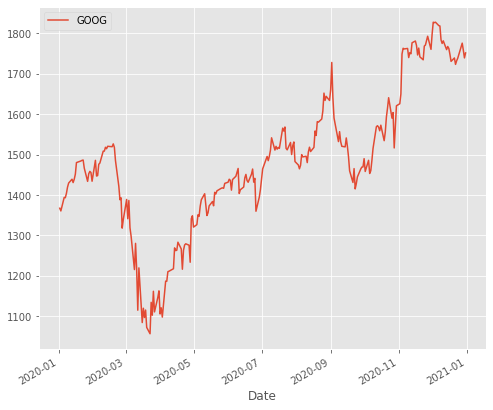

In [ ]:
# matplotlib plot of Google data
mpl.rc('figure', figsize=(8, 7))
mpl.__version__


style.use('ggplot')
googleClose2020.plot(label='GOOG')
#avgMean.plot(label='avgMean')
plt.legend()

In [ ]:
past = datetime.datetime(2015, 1, 1)
present = datetime.datetime(2020, 4, 1)

# Yahoo API google finance data
google = data.DataReader("GOOG", 'yahoo', start=past, end=present)
google.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-26,1169.969971,1093.530029,1111.800049,1161.750000,3571700.0,1161.750000
2020-03-27,1150.670044,1105.910034,1125.670044,1110.709961,3208500.0,1110.709961
2020-03-30,1151.630005,1096.479980,1125.040039,1146.819946,2574100.0,1146.819946
2020-03-31,1175.310059,1138.140015,1147.300049,1162.810059,2486400.0,1162.810059
2020-04-01,1129.689941,1097.449951,1122.000000,1105.619995,2344200.0,1105.619995


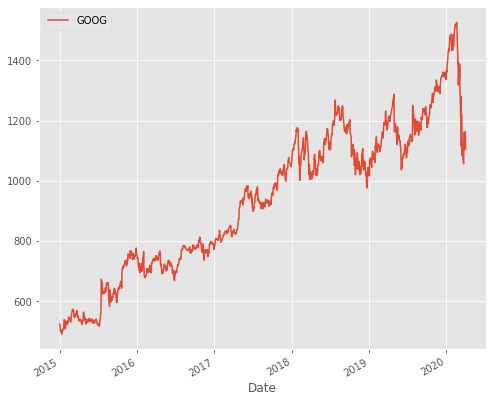

In [ ]:
googleClose = google['Adj Close']

mpl.rc('figure', figsize=(8, 7))
mpl.__version__


style.use('ggplot')
googleClose.plot(label='GOOG')
#avgMean.plot(label='avgMean')
plt.legend()

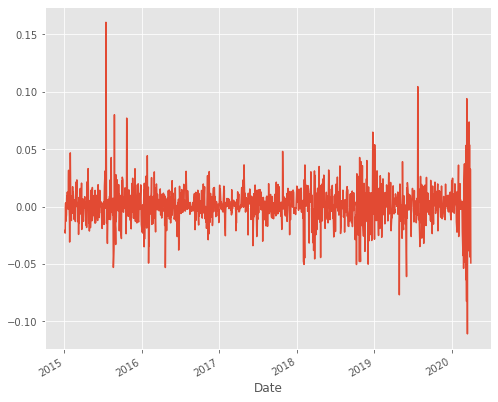

In [ ]:
# returns
returns = googleClose / googleClose.shift(1) - 1
returns.plot(label='return')

In [ ]:
# Yahoo finance API data 
past = datetime.datetime(2015, 1, 1)
present = datetime.datetime(2020, 4, 1)


Attributes  Adj Close                          ...     Volume                       
Symbols          AAPL         GE         GOOG  ...       GOOG        IBM        MSFT
Date                                           ...                                  
2020-03-26  63.815430  64.549179  1161.750000  ...  3571700.0  7482561.0  64568100.0
2020-03-27  61.173321  60.574471  1110.709961  ...  3208500.0  6718458.0  57042300.0
2020-03-30  62.919079  62.720810  1146.819946  ...  2574100.0  5820467.0  63420300.0
2020-03-31  62.790680  63.118279  1162.810059  ...  2486400.0  6635092.0  77927200.0
2020-04-01  59.486820  55.963814  1105.619995  ...  2344200.0  6394093.0  57969900.0

[5 rows x 30 columns]

In [ ]:
df = data.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=past,end=present)['Adj Close']
df.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2020-03-26,63.815422,64.549171,1161.750000,98.654617,153.607910
2020-03-27,61.173321,60.574467,1110.709961,94.407463,147.300629
2020-03-30,62.919083,62.720810,1146.819946,98.689568,157.661865
2020-03-31,62.790676,63.118290,1162.810059,96.941780,155.182281
2020-04-01,59.486820,55.963818,1105.619995,91.881889,149.672012


In [ ]:

# correlation plot
correlation = df.pct_change()
corr = correlation.corr()
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.426416,0.612287,0.520649,0.675125
GE,0.426416,1.000000,0.387735,0.486742,0.429476
GOOG,0.612287,0.387735,1.000000,0.511889,0.721428
IBM,0.520649,0.486742,0.511889,1.000000,0.588914
MSFT,0.675125,0.429476,0.721428,0.588914,1.000000


Text(0, 0.5, 'Microsoft Returns')

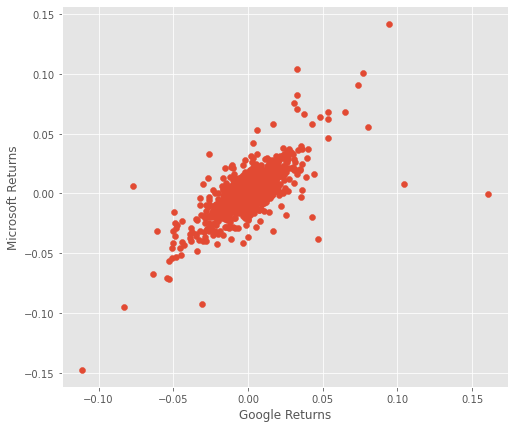

In [ ]:
plt.scatter(correlation.GOOG, correlation.MSFT)
plt.xlabel('Google Returns')
plt.ylabel('Microsoft Returns')

Text(0, 0.5, 'Apple Returns')

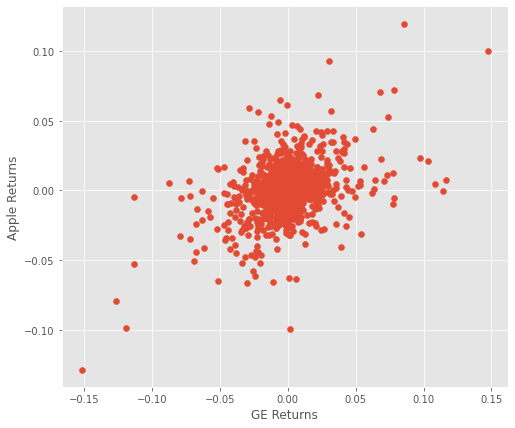

In [ ]:
plt.scatter(correlation.GE, correlation.AAPL)
plt.xlabel('GE Returns')
plt.ylabel('Apple Returns')

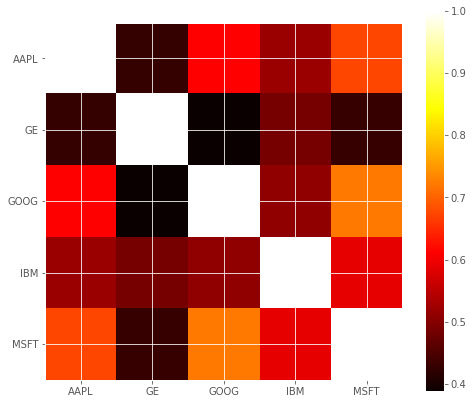

In [ ]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

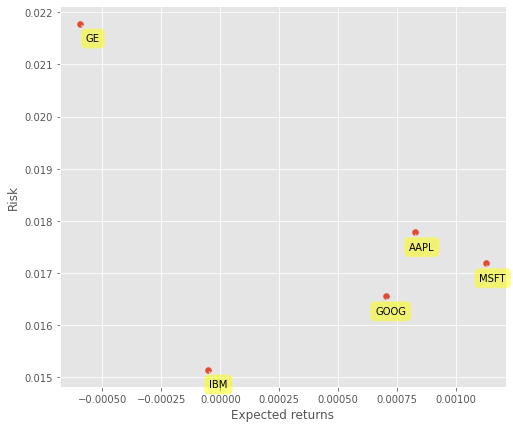

In [ ]:
plt.scatter(correlation.mean(), correlation.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(correlation.columns, correlation.mean(), correlation.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [ ]:

google.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-26,1169.969971,1093.530029,1111.800049,1161.750000,3571700.0,1161.750000
2020-03-27,1150.670044,1105.910034,1125.670044,1110.709961,3208500.0,1110.709961
2020-03-30,1151.630005,1096.479980,1125.040039,1146.819946,2574100.0,1146.819946
2020-03-31,1175.310059,1138.140015,1147.300049,1162.810059,2486400.0,1162.810059
2020-04-01,1129.689941,1097.449951,1122.000000,1105.619995,2344200.0,1105.619995


In [ ]:
dfFeat = google.loc[:,['Adj Close','Volume']]
dfFeat['HL_PCT'] = (google['High'] - google['Low']) / google['Close'] * 100.0
dfFeat['PCT_change'] = (google['Close'] - google['Open']) / google['Open'] * 100.0
dfFeat.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2020-03-26,1161.750000,3571700.0,6.579724,4.492710
2020-03-27,1110.709961,3208500.0,4.029856,-1.328994
2020-03-30,1146.819946,2574100.0,4.808952,1.935923
2020-03-31,1162.810059,2486400.0,3.196571,1.351870
2020-04-01,1105.619995,2344200.0,2.916010,-1.459893


In [ ]:
dfFeat.fillna(value=-99999, inplace=True)
# forecasting 20% of data and predicting the AdjCllose
forecast_col = 'Adj Close'
forecast_out = int(math.ceil(0.2 * len(dfFeat)))
dfFeat['label'] = dfFeat[forecast_col].shift(forecast_out)
dfFeat_noDrop = dfFeat
dfFeat.dropna(inplace=True)
dfFeat.tail()

,Adj Close,Volume,HL_PCT,PCT_change,label
Date,,,,,
2020-03-26,1161.750000,3571700.0,6.579724,4.492710,1142.319946
2020-03-27,1110.709961,3208500.0,4.029856,-1.328994,1175.760010
2020-03-30,1146.819946,2574100.0,4.808952,1.935923,1193.199951
2020-03-31,1162.810059,2486400.0,3.196571,1.351870,1193.319946
2020-04-01,1105.619995,2344200.0,2.916010,-1.459893,1185.550049


In [ ]:
forecast_out

265

In [ ]:
X = np.array(dfFeat.drop(['label'],1))
y = np.array(dfFeat['label'])
X = preprocessing.scale(X)
X_late = X[-forecast_out:]
y = np.array(dfFeat['label'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=2)

In [ ]:
# Linear regression
linearReg = LinearRegression()
linearReg.fit(X_train, y_train)

y_predict = linearReg.predict(X_test)
accuracy = linearReg.score(X_test, y_test)

print("Prediction Accuracy: %.1f%%" % (accuracy * 100.0))

Prediction Accuracy: 74.9%


In [ ]:
forecastStock = linearReg.predict(X_late)
dfFeat['Forecast'] = np.nan

In [ ]:
dfFeat.tail()

,Adj Close,Volume,HL_PCT,PCT_change,label,Forecast
Date,,,,,,
2020-03-26,1161.750000,3571700.0,6.579724,4.492710,1142.319946,NaN
2020-03-27,1110.709961,3208500.0,4.029856,-1.328994,1175.760010,NaN
2020-03-30,1146.819946,2574100.0,4.808952,1.935923,1193.199951,NaN
2020-03-31,1162.810059,2486400.0,3.196571,1.351870,1193.319946,NaN
2020-04-01,1105.619995,2344200.0,2.916010,-1.459893,1185.550049,NaN


In [ ]:
dfFeat.iloc[-1].name

Timestamp('2020-04-01 00:00:00')

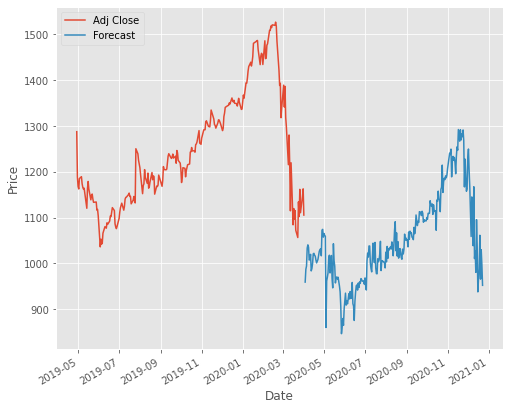

In [ ]:
dateRecent = dfFeat.iloc[-1].name
nextCalc = dateRecent + datetime.timedelta(days=1)

for i in forecastStock:
    datePred = nextCalc
    nextCalc += datetime.timedelta(days=1)
    dfFeat.loc[nextCalc] = [np.nan for _ in range(len(dfFeat.columns)-1)]+[i]
dfFeat['Adj Close'].tail(500).plot()
dfFeat['Forecast'].tail(500).plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# setting the timeframe for our data gathering
past = datetime.datetime(2020, 1, 1)
present = datetime.datetime(2020, 5, 1)

# Yahoo API google finance data
google = data.DataReader("GOOG", 'yahoo', start=past, end=present)
google.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-27,1296.150024,1269.000000,1296.000000,1275.880005,1600600,1275.880005
2020-04-28,1288.050049,1232.199951,1287.930054,1233.670044,2951300,1233.670044
2020-04-29,1359.989990,1325.339966,1341.459961,1341.479980,3793600,1341.479980
2020-04-30,1352.819946,1322.489990,1324.880005,1348.660034,2668900,1348.660034
2020-05-01,1352.069946,1311.000000,1328.500000,1320.609985,2072500,1320.609985


In [ ]:
# moving average mean of closing data for past 6 months
googleClose = google['Adj Close']
#vgMean = googleClose.rolling(window=180).mean()

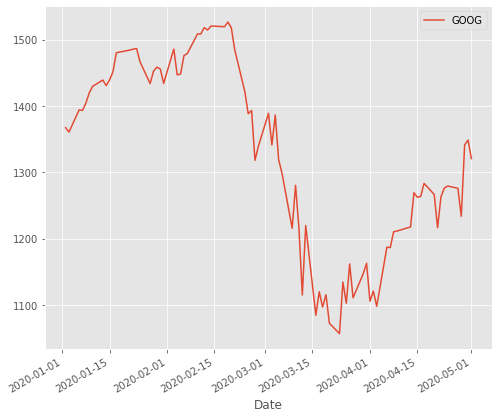

In [ ]:
# matplotlib plot of Google data
mpl.rc('figure', figsize=(8, 7))
mpl.__version__


style.use('ggplot')
googleClose.plot(label='GOOG')
#avgMean.plot(label='avgMean')
plt.legend()

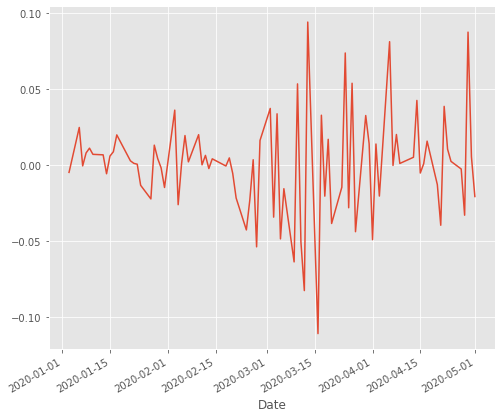

In [ ]:
# returns
returns = googleClose / googleClose.shift(1) - 1
returns.plot(label='return')

In [ ]:
df = data.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=past,end=present)
df.tail()

Attributes  Adj Close                          ...     Volume                       
Symbols          AAPL         GE         GOOG  ...       GOOG        IBM        MSFT
Date                                           ...                                  
2020-04-27  69.921890  51.114677  1275.880005  ...  1600600.0  5150295.0  33194400.0
2020-04-28  68.788490  54.055962  1233.670044  ...  2951300.0  4997893.0  34392700.0
2020-04-29  71.047867  52.307091  1341.479980  ...  3793600.0  5499450.0  51286600.0
2020-04-30  72.546700  54.055962  1348.660034  ...  2668900.0  6941047.0  53875900.0
2020-05-01  71.378754  51.671139  1320.609985  ...  2072500.0  5152073.0  39370500.0

[5 rows x 30 columns]

In [ ]:

df = data.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',
                     start=past,end=present)['Adj Close']
df.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2020-04-27,69.921890,51.114677,1275.880005,110.041527,171.260376
2020-04-28,68.788498,54.055958,1233.670044,110.347404,167.088303
2020-04-29,71.047882,52.307083,1341.479980,112.462250,174.586197
2020-04-30,72.546700,54.055958,1348.660034,109.726929,176.337677
2020-05-01,71.378754,51.671135,1320.609985,106.502243,171.772034


In [ ]:
# correlation plot
correlation = df.pct_change()
corr = correlation.corr()
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.730366,0.898244,0.805050,0.933509
GE,0.730366,1.000000,0.677500,0.727004,0.716911
GOOG,0.898244,0.677500,1.000000,0.797066,0.912285
IBM,0.805050,0.727004,0.797066,1.000000,0.798018
MSFT,0.933509,0.716911,0.912285,0.798018,1.000000


Text(0, 0.5, 'Microsoft Returns')

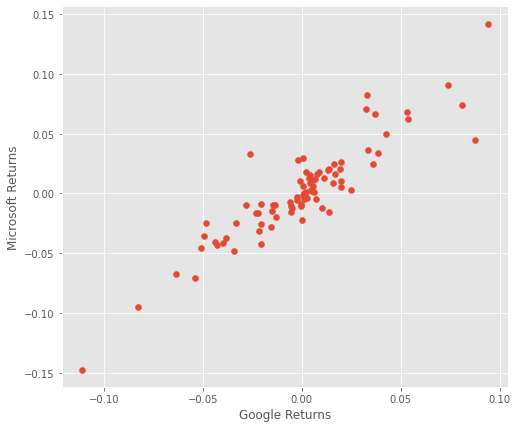

In [ ]:
plt.scatter(correlation.GOOG, correlation.MSFT)
plt.xlabel('Google Returns')
plt.ylabel('Microsoft Returns')

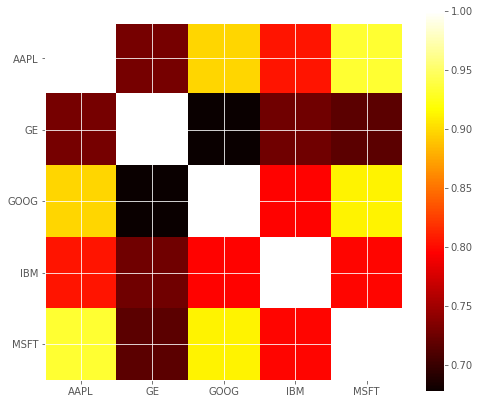

In [ ]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

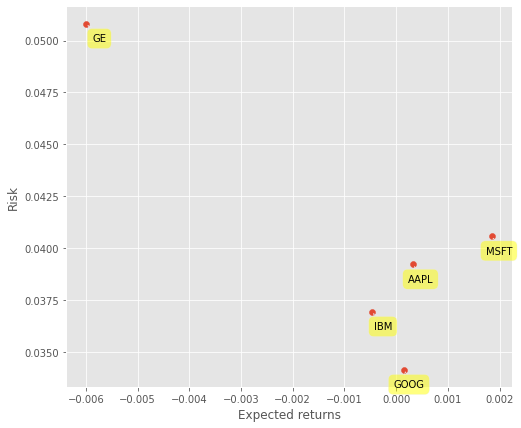

In [ ]:
plt.scatter(correlation.mean(), correlation.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(correlation.columns, correlation.mean(), correlation.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [ ]:
# setting the timeframe for our data gathering
past = datetime.datetime(2020, 11, 1)
present = datetime.datetime(2021, 11, 19)

# Yahoo API google finance data
google = data.DataReader("GOOG", 'yahoo', start=past, end=present)
google.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-15,3009.540039,2973.050049,3000.000000,2987.760010,812400,2987.760010
2021-11-16,2996.649902,2967.000000,2983.409912,2981.520020,862700,2981.520020
2021-11-17,2992.520020,2971.260010,2984.580078,2981.239990,764500,2981.239990
2021-11-18,3032.199951,2979.969971,2982.919922,3014.179932,1332900,3014.179932
2021-11-19,3037.000000,2997.750000,3020.000000,2999.050049,988300,2999.050049


In [ ]:
# moving average mean of closing data for past 6 months
googleClose = google['Adj Close']
#vgMean = googleClose.rolling(window=180).mean()

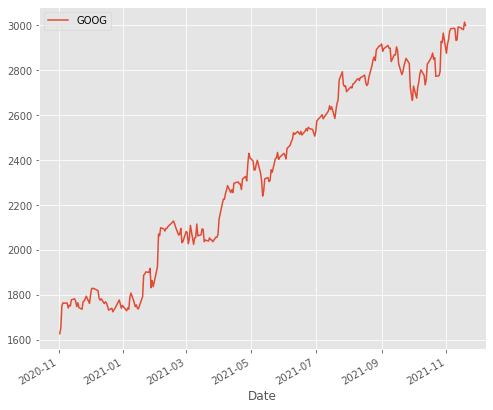

In [ ]:
# matplotlib plot of Google data
mpl.rc('figure', figsize=(8, 7))
mpl.__version__


style.use('ggplot')
googleClose.plot(label='GOOG')
#avgMean.plot(label='avgMean')
plt.legend()

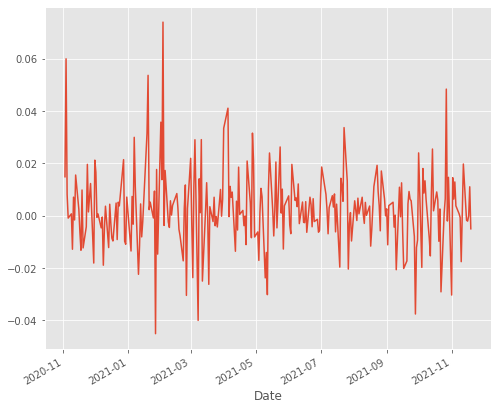

In [ ]:
# returns
returns = googleClose / googleClose.shift(1) - 1
returns.plot(label='return')

In [ ]:
df = data.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=past,end=present)
df.tail()

Attributes   Adj Close              ...     Volume            
Symbols           AAPL          GE  ...        IBM        MSFT
Date                                ...                       
2021-11-15  150.000000  106.669998  ...  5046300.0  16723000.0
2021-11-16  151.000000  103.349998  ...  4750800.0  20886800.0
2021-11-17  153.490005  101.989998  ...  4043300.0  19053400.0
2021-11-18  157.869995  100.669998  ...  5046900.0  22463500.0
2021-11-19  160.550003   99.959999  ...  5380200.0  21942200.0

[5 rows x 30 columns]

In [ ]:
df = data.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',
                     start=past,end=present)['Adj Close']
df.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2021-11-15,150.000000,106.669998,2987.760010,118.870003,335.456299
2021-11-16,151.000000,103.349998,2981.520020,118.459999,338.890015
2021-11-17,153.490005,101.989998,2981.239990,118.059998,339.119995
2021-11-18,157.869995,100.669998,3014.179932,116.660004,341.269989
2021-11-19,160.550003,99.959999,2999.050049,116.050003,343.109985


In [ ]:
# correlation plot
correlation = df.pct_change()
corr = correlation.corr()
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.054233,0.537254,0.032301,0.657898
GE,0.054233,1.000000,0.018518,0.412322,-0.112048
GOOG,0.537254,0.018518,1.000000,0.052586,0.697746
IBM,0.032301,0.412322,0.052586,1.000000,-0.016125
MSFT,0.657898,-0.112048,0.697746,-0.016125,1.000000


Text(0, 0.5, 'Microsoft Returns')

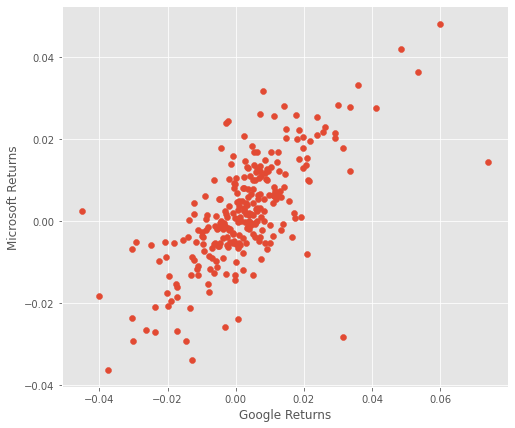

In [ ]:
plt.scatter(correlation.GOOG, correlation.MSFT)
plt.xlabel('Google Returns')
plt.ylabel('Microsoft Returns')

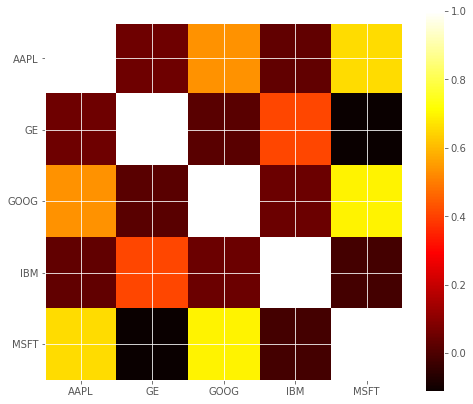

In [ ]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

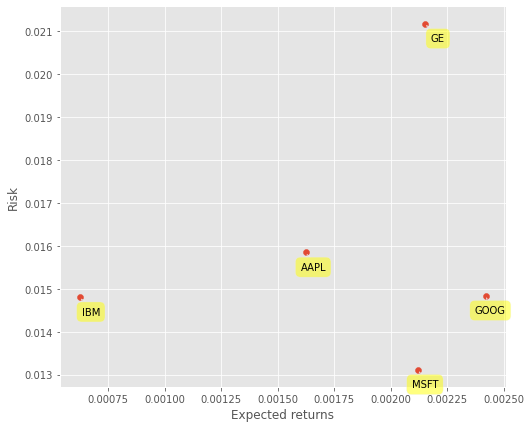

In [ ]:
plt.scatter(correlation.mean(), correlation.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(correlation.columns, correlation.mean(), correlation.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))